Этот файл создан 16.01.2019. Здесь я повторяю решение задачи, над которой бился целый день 05.03.2017.

### Пункт 1. Анализ текста с предложениями на английском языке (файл sentences.txt)

#### Подпункт 1.1. Скачайте файл с предложениями (sentences.txt)

In [1]:
import numpy as np
import scipy as sp
import re
from scipy import spatial
from scipy.spatial.distance import cosine

In [22]:
file_obj = open('sentences.txt')

#### Подпункт 1.2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().

In [23]:
lines_list = list(file_obj)

In [24]:
for i in range(len(lines_list)):
    lines_list[i] = lines_list[i].strip()
    lines_list[i] = lines_list[i].lower()
    #print lines_list[i]

#### Подпункт 1.3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.

Комментарий 19.10.2019: из текста этого пункта непонятно, как нужно разбивать: каждое предложение в отдельности или весь текст целиком; т.е. непонятно, какая струтура должна получиться в результате. А задача была поставлена такая: должен получиться список неуникальных слов, из которых состоит весь текст (все предложения, из которых состоит текст).

In [25]:
words_list = re.split('[^a-z]', ' '.join(lines_list))

In [26]:
# См. комментарии здесь:
# https://docs.python.org/2/library/functions.html#filter
#
# Цитата: 
# Note that filter(function, iterable) is equivalent to [item for item in iterable if function(item)] if function is not None 
# and [item for item in iterable if item] if function is None.
#
words_list = list(filter(None, words_list))

#### Подпункт 1.4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.

In [27]:
# Функция set() превращает свой аргумент в множество set.
# См. здесь:
# http://qaru.site/questions/170148/understanding-the-set-function
# Множество (set) - это список (list), в котором нет дублиатов.

f = set(words_list) # убираем дубликаты
words_list_without_rep = list(f) # снова преобразуем в список

In [28]:
word_dict = dict()

In [29]:
for line in words_list_without_rep:
    print line
    word_dict[line] = words_list.count(line)

third
second
blabla
fourth
bla
fifth
first


In [30]:
print word_dict

{'third': 4, 'second': 5, 'blabla': 1, 'fourth': 5, 'bla': 1, 'fifth': 3, 'first': 4}


#### Подпункт 1.5. Создайте матрицу размера n x d, где n — число предложений. Заполните её: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254

In [31]:
# Функция zeros() возвращает новый массив указанной формы и типа, заполненный нулями
a = np.zeros((len(lines_list), len(words_list_without_rep)))

In [32]:
# re.split возвращает список строк - слов
# метод count возвращает количество вхождений параметра в список
for i in range(len(lines_list)):
   words_list_in_line = re.split('[^a-z]', lines_list[i]) 

   for j in range(len(words_list_without_rep)):
      a[i][j] = words_list_in_line.count(words_list_without_rep[j])
    
# Комментарий 08.10.2019:
# При повторении этого задания я допустил ошибку: пропустил присваивание:
#    words_list_in_line = re.split('[^a-z]', lines_list[i])
# и вместо выражения
#    words_list_in_line.count(words_list_without_rep[j]) 
# использовал просто 
#    lines_list[i].count(words_list_without_rep[j])
#
# Т.е. предложение lines_list[i] не было разбито на слова, это предложение так и осталось единой строкой.
#
# В результате проводился не подсчёт количества упоминаний отдельных слов в предложениях, а подсчёт количества упоминаний 
# набора символов (без отличия в том, является ли этот набор символов отдельным словом, или не является).

#
# Например, для предложения "in comparison to dogs, cats have not undergone major changes during the domestication process."
# количество упоминаний слова "on" рассчиталось равным 3 (трём), тогда как должно быть 0 (ноль), т.к. ни одного слова "on" 
# в этом предложении нет.

In [ ]:
# Заготовка для вывода в файл массива a:
#string_all = ''

#for k in range(len(lines_list)):
#    string_all = string_all + ';' + lines_list[k]

#for i in range(len(words_list_without_rep)):
#    string_all = string_all + '\n' + words_list_without_rep[i]
#    for j in range(len(lines_list)):
#        string_all = string_all + ';' + str(a[j][i])        

#with open('result_a.csv', 'w') as result_a_file:
#    result_a_file.write(string_all)        

In [33]:
print a

[[ 1.  1.  0.  1.  0.  1.  1.]
 [ 1.  1.  0.  1.  0.  1.  1.]
 [ 0.  1.  1.  0.  1.  0.  0.]
 [ 1.  1.  0.  1.  0.  1.  1.]
 [ 1.  1.  0.  2.  0.  0.  1.]]


#### Подпункт 1.6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание.

In [44]:
# Необходимо отметить 2 важных момента:

# 1. Особенности функции cosine().
#    Аргументами функции scipy.spatial.distance.cosine должны быть массивы (array_like), состоящие из чисел.
#    Если передать функции массивы, состоящие из строк, то будет ошибка: 
#    "ValueError: data type must provide an itemsize"
#    Т.е. получается, что реально мы сраниваем не сами строки (предложения), 
#    а наборы чисел - количеств вхождений каждого слова в текущее предложение.
#
# 2. Как правильно отсортировать результаты, чтобы понять, какие два предложения самие близкие к первой строке?
#    Нужно сформировать словарь, в котором ключами будут номера предложений, а значениями - косинусные расстояния 
#    до первого предложения. Потом отсортировать этот словарь по значениям (а не по ключам!). Это можно сделать с помощью 
#    функции sorted, если использовать operator.itemgetter (см. код ниже).

# Кстати:
# Aункция scipy.spatial.distance.cosine почему-то вычисляет не косинус, а 1 - косинус. 
# Т.е. чем ближе значение  нулю, тем ближе строки. 
# И наоборот: чем ближе значение к единице, тем дальше друг от друга строки.

# words_list_in_line_0 = np.array(re.split('[^a-z]', lines_list[0])) # это не работает: нужно сравнивать не строки, а числа
words_list_in_line_0 = a[0] # берём числа - количества вхождений каждого слова в первое предложение

res = dict()

for i in range(len(lines_list)):
    #words_list_in_line = np.array(re.split('[^a-z]', lines_list[i])) # это не работает: нужно сравнивать не строки, а числа
    words_list_in_line = a[i]    # берём числа - количества вхождений каждого слова в текущее предложение
    #res[i] = sp.spatial.distance.cosine(words_list_in_line_0, words_list_in_line)
    res[lines_list[i]] = sp.spatial.distance.cosine(words_list_in_line_0, words_list_in_line)

In [45]:
res

{'bla blabla second.': 0.7418011102528389,
 'first second third fourth fifth.': 2.2204460492503131e-16,
 'fourth fourth third second first.': 0.15484574527148354,
 'second first fifth third fourth.': 2.2204460492503131e-16}

In [ ]:
# Комментарий 08.10.2019:
# Заготовка для вывода в файл словаря с результатом:
# with open('result_dict.csv', 'w') as result_dict_file:
#    result_dict_file.writelines(res[0] + ';' + str(res[1]) + ';\n' for res in result_dict.items())

In [42]:
# Теперь сортируем этот словарь по значениям (а не по ключам!)
import operator
sorted_res = sorted(res.items(), key = operator.itemgetter(1))

In [36]:
# При этом почему-то словарь res превратился в список sorted_res:
print type(sorted_res)
print type(res)

<type 'list'>
<type 'dict'>


In [43]:
# Выводим отсортированный по значениям (а не по ключам!) список.
# 1-й элемент (индекс = 0) соответствует предложению, с которым производится сравнение (поэтому расстояние = 0).
# 2-й элемент (индекс = 6) и 3-й элемент (индекс = 4) - это предложения с наименьшим расстоянием до предложения, 
# с которым производится сравнение.
sorted_res

[(0, 2.2204460492503131e-16),
 (1, 2.2204460492503131e-16),
 (3, 2.2204460492503131e-16),
 (4, 0.15484574527148354),
 (2, 0.7418011102528389)]

#### Общее замечание для пункта 1:

При вычислении косинусного расстояния в данной задаче используется количество вхождений каждого слова в каждое предложение. Т.е. каждому предложению соответствует один одномерный вектор, элементы которого - это числа, каждое из которых равно количеству вхождений соответствующего слова в это предложение. Если в этом предложении такого слова нет, то такому слову будет соответствовать число 0 (ноль).
При таком подходе, например, такие предложения будут иметь одинаковые косинусные расстояния от первого предложения:

Я пойду гулять.
Пойду я гулять.
Гулять я пойду.

Хотя более точным будет другой подход: нужно использовать не одно число (количество вхождений каждого слова), а кортеж (перечень порядковых номеров мест, на которых данное слово находится  данном предложении). Если данное слово не встречается в данном предложении, то кортеж будет состоять из одного элемента равного нулю.

Аргументами функции scipy.spatial.distance.cosine должны быть не списки чисел, а списки таких кортежей.

Но если заменить аргументы функции scipy.spatial.distance.cosine - списки чисел (words_list_in_line_0 и words_list_in_line) на списки кортежей, то будет ошибка:

list_of_tuples_1 = [ (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]
list_of_tuples_2 = [ (2, 2), (2, 2), (1, 1), (1, 1), (1, 1)]
res = sp.spatial.distance.cosine(list_of_tuples_1, list_of_tuples_2)

ValueError: Input vector should be 1-D.


Надо пробовать какую-то другую реализацию или использовать другие функции вычисления расстояния.

#### P.S. для пункта №1

Решение, которым воспользовался я 05.03.2017 взято отсюда:
http://www.cyberforum.ru/python-science/thread1853010.html

Человек, который привёл это решение, не знал о существовании функции scipy.spatial.distance.cosine.
Он написал свою функцию, в которой косинусное расстояние вычисляется так:

def cosine_distance(u, v):
    return 1.0 - (dot(u, v) / (norm(u) * norm(v)))
    
Функция numpy.dot - это вычисление скалярного произведения (по-английски "dot product" или "inner product").

Функция numpy.linalg.norm - это вычисление нормы вектора или матрицы.

#### P.S.S. для пункта №1

Есть альтернативный вариант решения, гораздо более лаконичный. Но в этом варианте не используется spatial.distance.cosine.

In [ ]:
# Альтернативный вариант решения. Это взято отсюда:
# https://github.com/sknsht/machine-learning-data-analysis/blob/master/mathematics-and-python/W2/HW/programming_assignment.ipynb

cosine_distances = [(i, cosine(bow[0], bow[i])) for i in range(len(sentences))]

sorted_distances = sorted(distances, key=lambda tup: tup[1])

# два предложения, ближайших к первому по косинусному расстоянию
print sorted_distances[1][0], sorted_distances[2][0]


#
# Ещё вот это надо посмотреть:
# http://qaru.site/questions/5918952/calculating-cosine-distance-between-the-rows-of-matrix


### Пункт 2.

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений (см. скрин в файле 
01_Математика и Python для анализа данных\Week_2\Материалы_лекций\3_Линейная_алгебра_Матрицы\Задание_по_программированию\Задание_по_программированию_НЕДОСТУПНО.docx)

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.


#### Подпункт 2.1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

Массив x - это коэффииенты w0, w1.

Комментарий от 10.10.2019: наконец-то полностью дописал решение для Пункта 2 (до этого момента был описан только подпункт 2.1).

In [1]:
import numpy as np
from numpy import arange, sin, exp

In [12]:
# Это необязательно, ведь для вызова linalg.solve можно использовать numpy
import scipy as sp
from scipy import linalg

In [2]:
# Можно использовать как numpy.linalg.solve, так и scipy.linalg.solve. Чем они отличаются - непонятно.
a = np.array([[1, 1], [1, 15]])
b = np.array([3.2522, 0.6352])
x = np.linalg.solve(a, b)

In [3]:
print "Матрица A:\n", a
print "Вектор b:\n", b
print "Решение системы:\n", x

Матрица A:
[[ 1  1]
 [ 1 15]]
Вектор b:
[ 3.2522  0.6352]
Решение системы:
[ 3.43912857 -0.18692857]


In [ ]:
# Рисуем функцию f:

In [4]:
%matplotlib inline

In [5]:
from matplotlib import pylab as plt

In [6]:
x = np.arange(1.0, 16, 0.01)

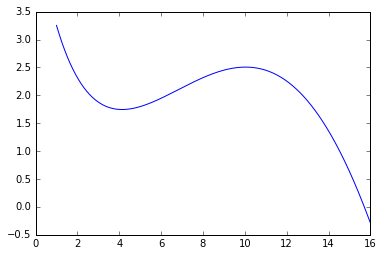

In [7]:
plt.plot(x, sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2))

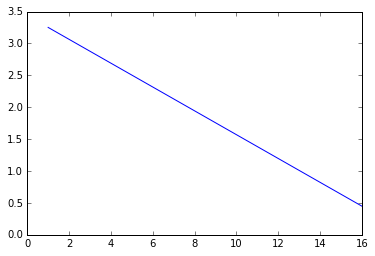

In [8]:
plt.plot(x, 3.43912857-0.18692857*x )

#### Подпункт 2.2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

In [39]:
a = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]])
b = np.array([3.252217, 2.31617, 0.635221])
x = np.linalg.solve(a, b)

print "Матрица A:\n", a
print "Вектор b:\n", b
print "Решение системы:\n", x

Матрица A:
[[  1   1   1]
 [  1   8  64]
 [  1  15 225]]
Вектор b:
[ 3.252217  2.31617   0.635221]
Решение системы:
[ 3.32512967 -0.06531163 -0.00760104]


In [40]:
x = np.arange(1.0, 16, 0.01)

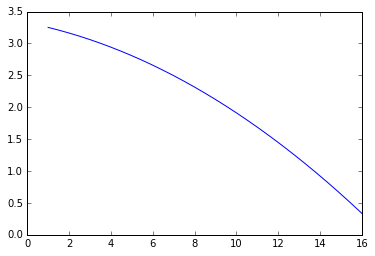

In [41]:
plt.plot(x, 3.32512967-0.06531163*x-0.00760104*(x**2) )

#### Подпункт 2.3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42).